In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

################### Sklearn ####################################
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info

<bound method DataFrame.info of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban 

In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1500 with 0 Axes>

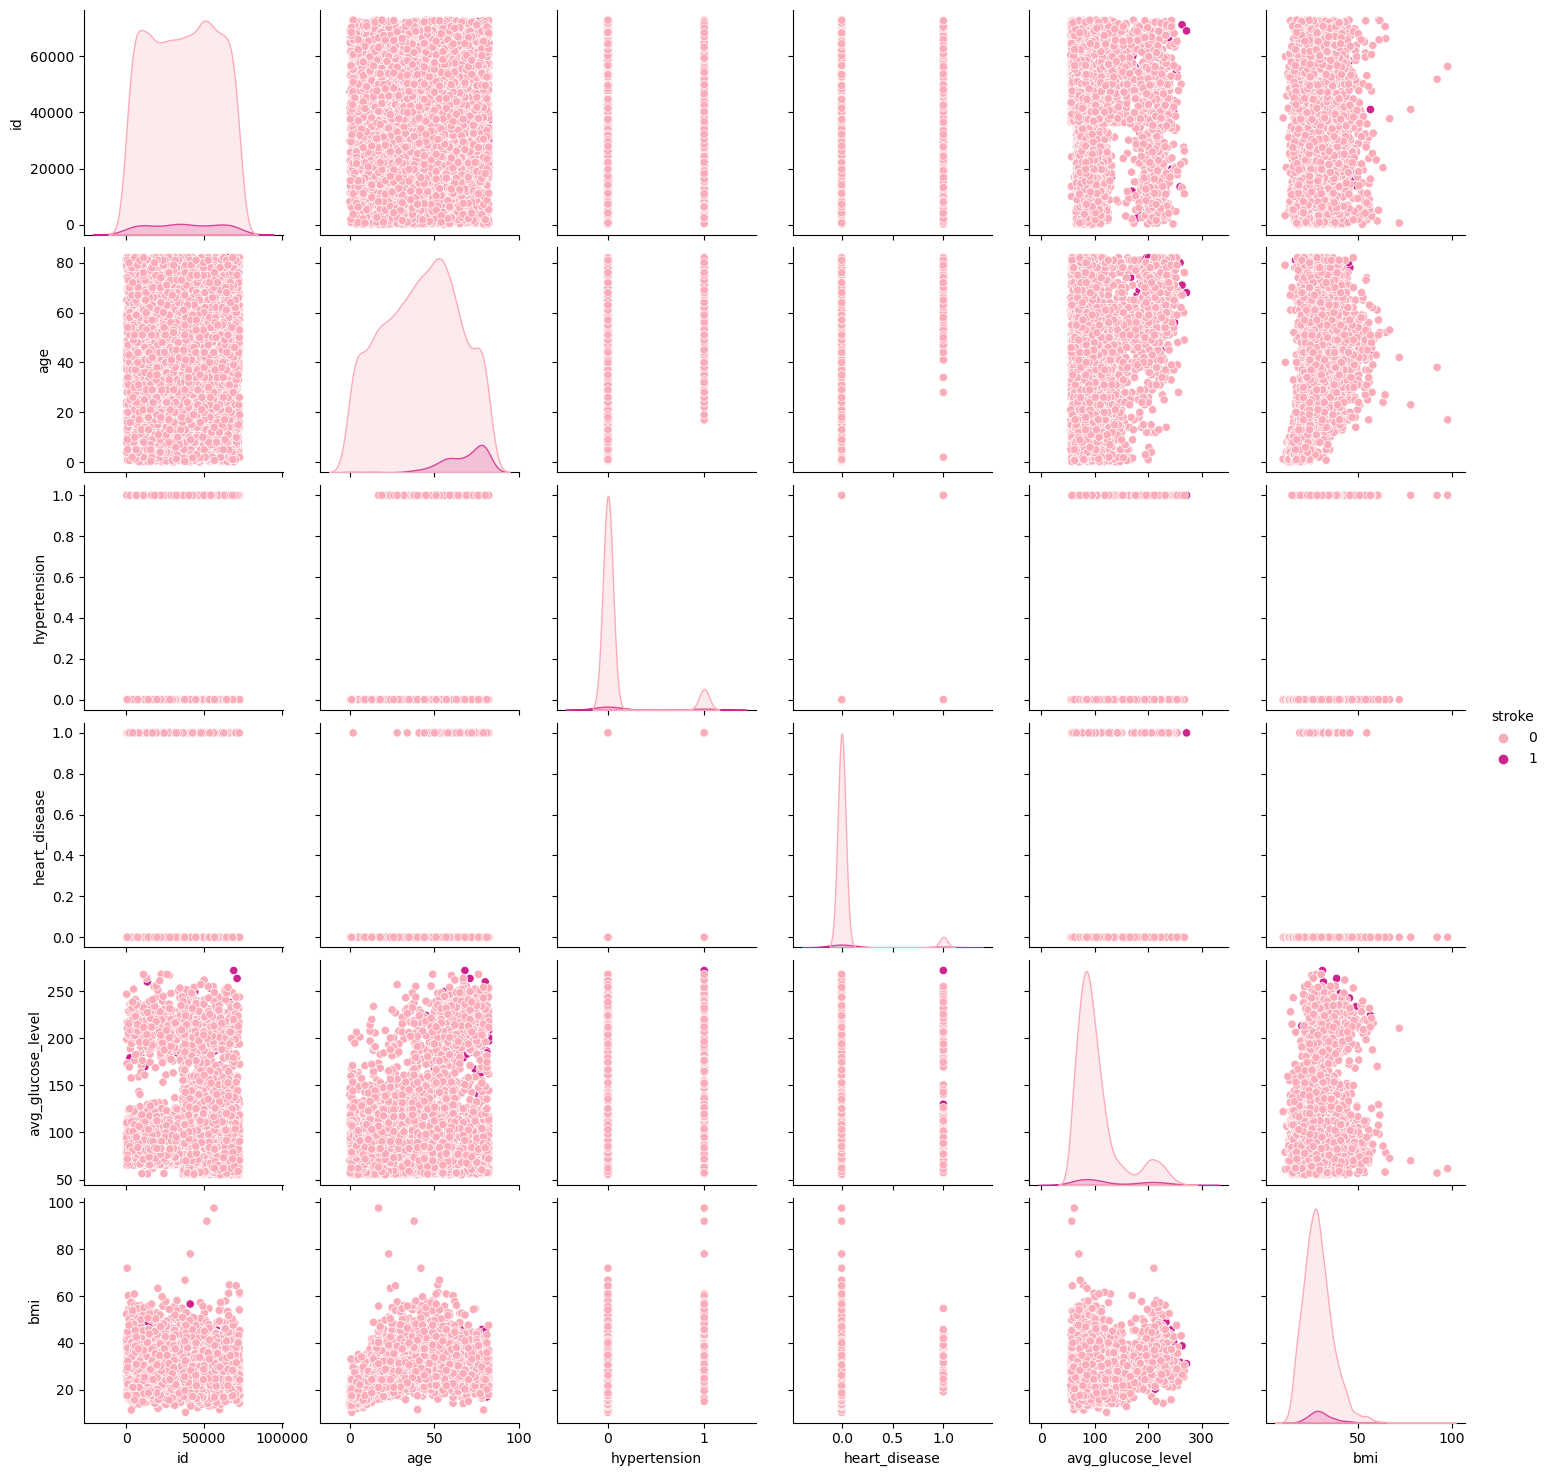

In [5]:
fig=plt.figure(figsize=(20,15),dpi=100)
sns.pairplot(df,hue="stroke",palette = "RdPu")

In [6]:
df.shape

(5110, 12)

In [7]:
duplicate = df[df.duplicated()]

duplicate

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [8]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [9]:
# id: unique identifier, Drop column = 'id'
df.drop(columns='id', inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [11]:
round(df.describe(include='all'), 2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110.00,5110.0,5110.00,5110,5110,5110,5110.00,4909.00,5110,5110.00
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,NaN,43.23,0.1,0.05,NaN,NaN,NaN,106.15,28.89,NaN,0.05
std,NaN,22.61,0.3,0.23,NaN,NaN,NaN,45.28,7.85,NaN,0.22
min,NaN,0.08,0.0,0.00,NaN,NaN,NaN,55.12,10.30,NaN,0.00
25%,NaN,25.00,0.0,0.00,NaN,NaN,NaN,77.24,23.50,NaN,0.00
50%,NaN,45.00,0.0,0.00,NaN,NaN,NaN,91.88,28.10,NaN,0.00
75%,NaN,61.00,0.0,0.00,NaN,NaN,NaN,114.09,33.10,NaN,0.00


In [12]:
#now the 5110 samples doesn't have any null values

In [13]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [14]:
#we need how much of the data is missing
print((df.isna().sum()/len(df))*100)

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


In [15]:
#it's nearly 4%

In [16]:
#to see the main columns except stroke
cols = df.columns[:-1]
cols

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [17]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


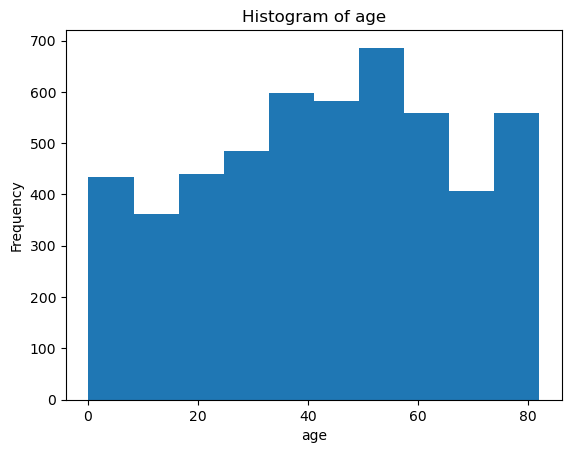

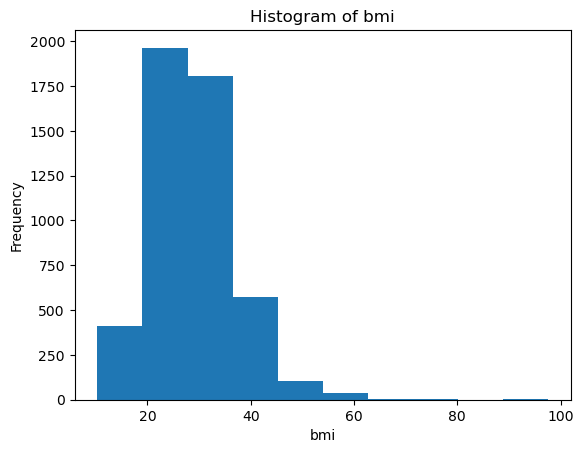

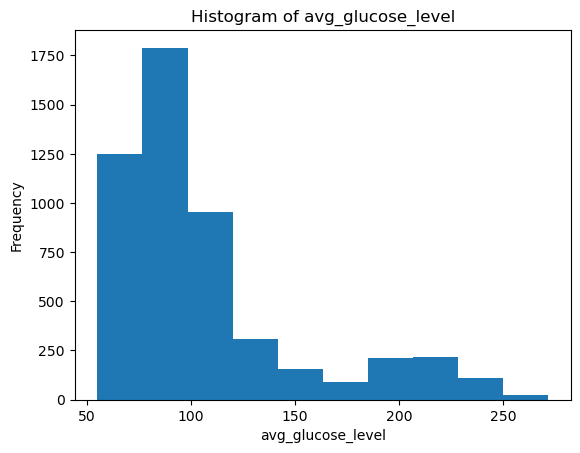

In [18]:

df_numerical2 = ['age', 'bmi','avg_glucose_level']
for column in df_numerical2:
    plt.hist(df[column])
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

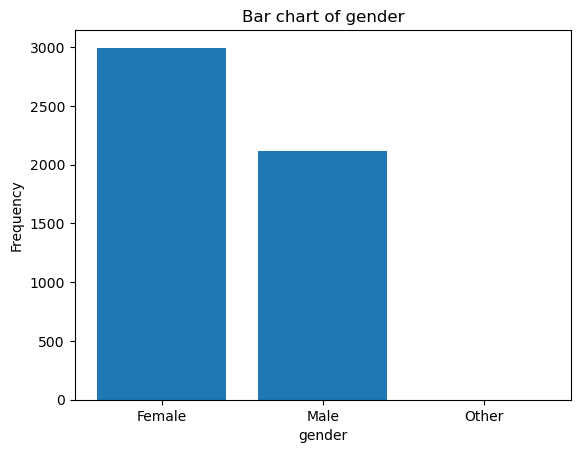

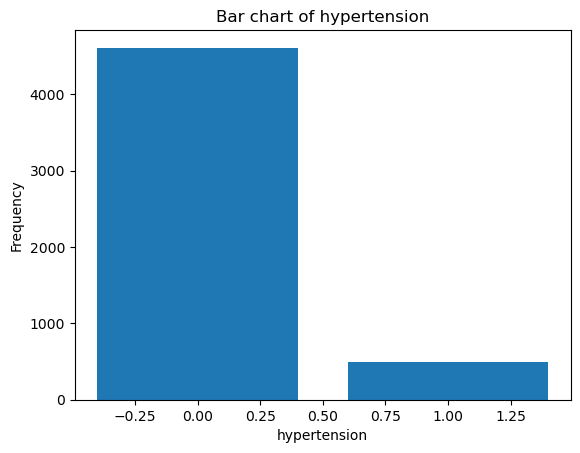

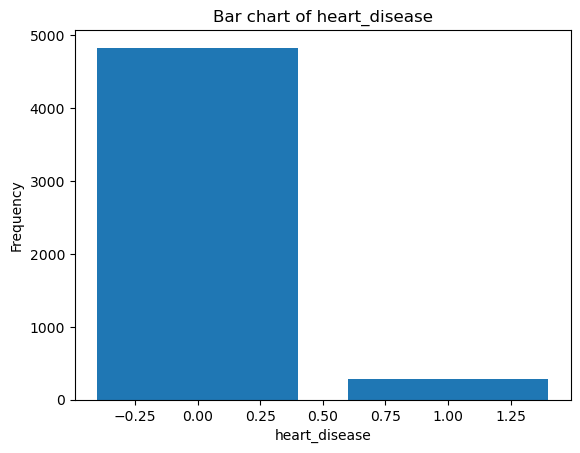

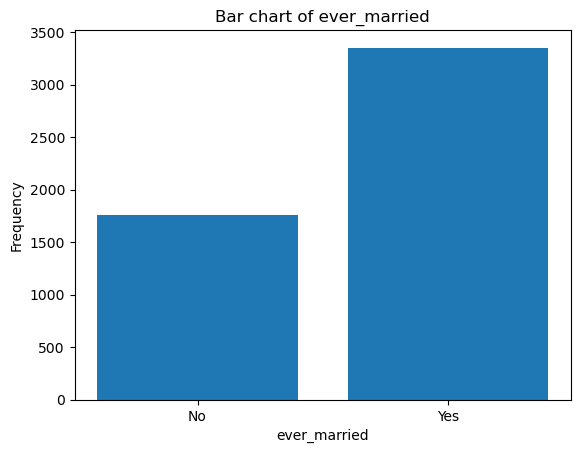

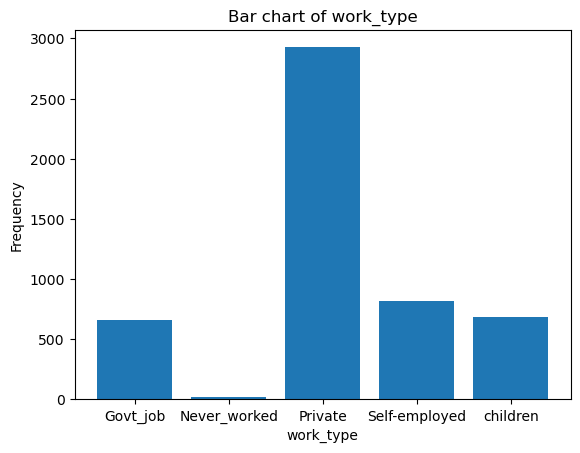

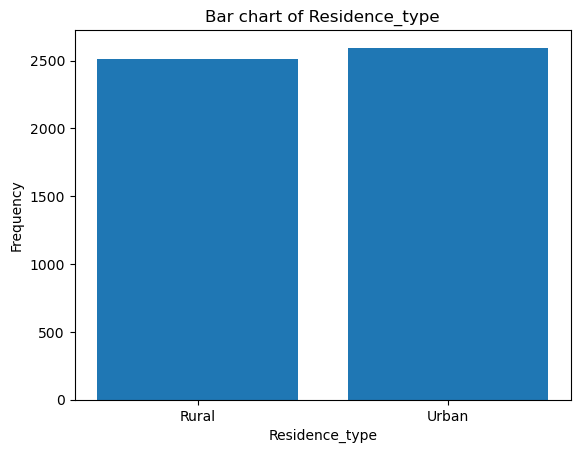

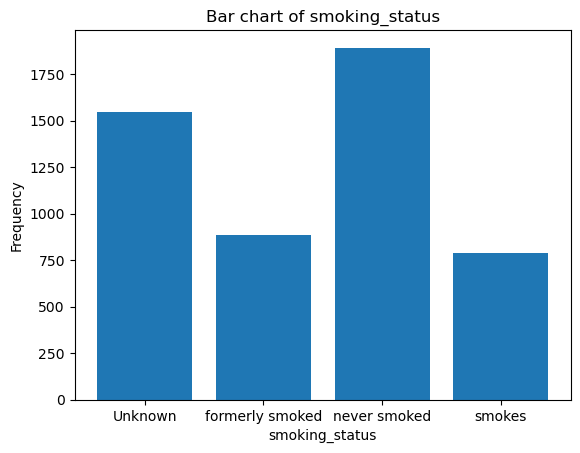

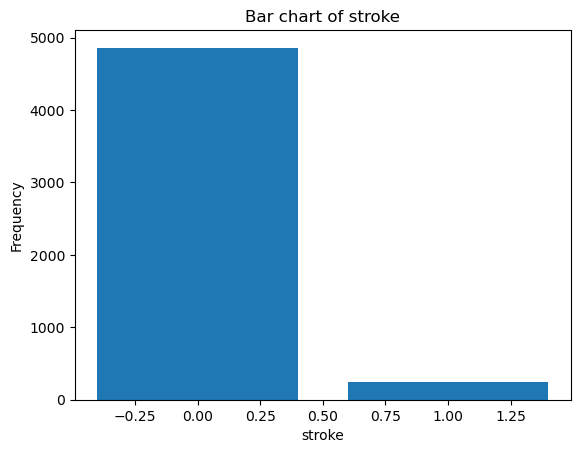

In [19]:
df_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
for column in df_categorical:
    values, counts = np.unique(df[column], return_counts=True)
    plt.bar(values, counts)
    plt.title(f'Bar chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency') 
    plt.show() 

In [20]:
pd.crosstab(df.gender,df.ever_married)

ever_married,No,Yes
gender,,
Female,993,2001
Male,763,1352
Other,1,0


In [21]:
#The outer loop iterates through each column ,it prints the column name.
#The inner loop iterates through the unique values of that column using data[col].unique().
#it prints the value along with its index within that column.

columns_temp = ['gender', 'ever_married', 'work_type', 'smoking_status', 'Residence_type']
for col in columns_temp:
    print('column:', col)
    for index, unique in enumerate(df[col].unique()):
        print(unique, ':', index)
    print('_' * 35)


column: gender
Male : 0
Female : 1
Other : 2
___________________________________
column: ever_married
Yes : 0
No : 1
___________________________________
column: work_type
Private : 0
Self-employed : 1
Govt_job : 2
children : 3
Never_worked : 4
___________________________________
column: smoking_status
formerly smoked : 0
never smoked : 1
smokes : 2
Unknown : 3
___________________________________
column: Residence_type
Urban : 0
Rural : 1
___________________________________


In [22]:
# gender
df_2 = df.replace(
    {'gender' : {'Male' : 0, 'Female' : 1, 'Other' : 2}}
)

# ever_married
df_2 =  df_2.replace(
    {'ever_married' : {'Yes' : 0, 'No' : 1}}
)

# work_type
df_2 =  df_2.replace(
    {'work_type' : {'Private' : 0, 'Self-employed' : 1, 'Govt_job' : 2, 'children' : 3, 'Never_worked' : 4}}
)

# smoking_status
df_2 =  df_2.replace(
    {'smoking_status' : {'formerly smoked' : 0, 'never smoked' : 1, 'smokes' : 2, 'Unknown' : 3}}
)

# Residence_type
df_2 =  df_2.replace(
    {'Residence_type' : {'Urban' : 0, 'Rural' : 1}}
)

In [23]:
impute_knn = KNNImputer (n_neighbors=72)
df_2_imputed = impute_knn.fit_transform(df_2)

In [24]:
imputed_finalDF = pd.DataFrame(df_2_imputed, columns=df_2.columns)

In [25]:
imputed_finalDF.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,67.0,0.0,1.0,0.0,0.0,0.0,228.69,36.600000,0.0,1.0
1,1.0,61.0,0.0,0.0,0.0,1.0,1.0,202.21,35.201389,1.0,1.0
2,0.0,80.0,0.0,1.0,0.0,0.0,1.0,105.92,32.500000,1.0,1.0
3,1.0,49.0,0.0,0.0,0.0,0.0,0.0,171.23,34.400000,2.0,1.0
4,1.0,79.0,1.0,0.0,0.0,1.0,1.0,174.12,24.000000,1.0,1.0


In [26]:
print((imputed_finalDF.isna().sum()/len(df))*100)

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64


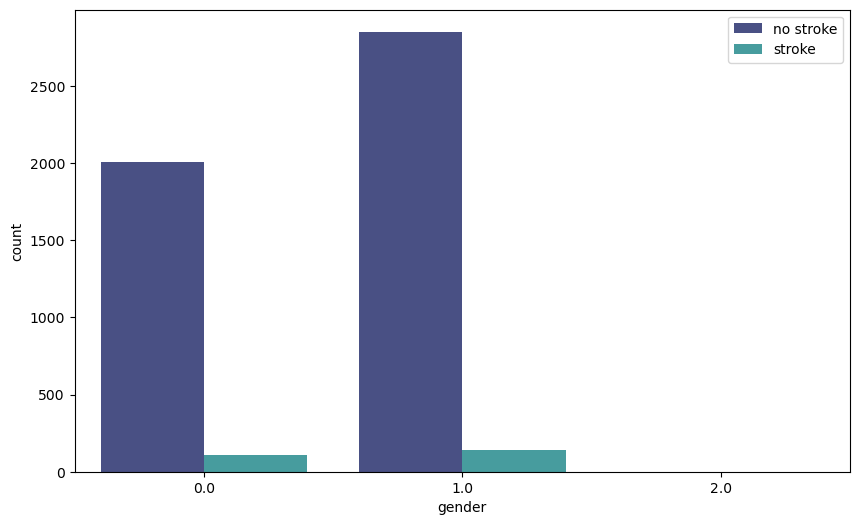

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x="gender", data=imputed_finalDF, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])

In [28]:
# Define X & y
X_temp = imputed_finalDF.drop(columns='stroke')
y = imputed_finalDF.stroke

In [29]:
X_temp .tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5105,1.0,80.0,1.0,0.0,0.0,0.0,0.0,83.75,27.220833,1.0
5106,1.0,81.0,0.0,0.0,0.0,1.0,0.0,125.20,40.000000,1.0
5107,1.0,35.0,0.0,0.0,0.0,1.0,1.0,82.99,30.600000,1.0
5108,0.0,51.0,0.0,0.0,0.0,0.0,1.0,166.29,25.600000,0.0
5109,1.0,44.0,0.0,0.0,0.0,2.0,0.0,85.28,26.200000,3.0


In [30]:
y.tail()

5105    0.0
5106    0.0
5107    0.0
5108    0.0
5109    0.0
Name: stroke, dtype: float64

In [31]:
scaler = MinMaxScaler().fit_transform(X_temp)
X = pd.DataFrame(scaler, columns=X_temp.columns)
X.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.293151,0.526692,0.097456,0.054012,0.343836,0.209491,0.491977,0.235563,0.213625,0.528506
std,0.246471,0.276033,0.296607,0.226063,0.475034,0.279674,0.499985,0.209046,0.088664,0.364174
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.304199,0.000000,0.000000,0.000000,0.000000,0.000000,0.102137,0.153494,0.333333
50%,0.500000,0.548340,0.000000,0.000000,0.000000,0.000000,0.000000,0.169721,0.206186,0.333333
75%,0.500000,0.743652,0.000000,0.000000,1.000000,0.500000,1.000000,0.272228,0.260023,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.0,0.816895,0.0,1.0,0.0,0.00,0.0,0.801265,0.301260,0.000000
1,0.5,0.743652,0.0,0.0,0.0,0.25,1.0,0.679023,0.285239,0.333333
2,0.0,0.975586,0.0,1.0,0.0,0.00,1.0,0.234512,0.254296,0.333333
3,0.5,0.597168,0.0,0.0,0.0,0.00,0.0,0.536008,0.276060,0.666667
4,0.5,0.963379,1.0,0.0,0.0,0.25,1.0,0.549349,0.156930,0.333333
...,...,...,...,...,...,...,...,...,...,...
5105,0.5,0.975586,1.0,0.0,0.0,0.00,0.0,0.132167,0.193824,0.333333
5106,0.5,0.987793,0.0,0.0,0.0,0.25,0.0,0.323516,0.340206,0.333333
5107,0.5,0.426270,0.0,0.0,0.0,0.25,1.0,0.128658,0.232532,0.333333
5108,0.0,0.621582,0.0,0.0,0.0,0.00,1.0,0.513203,0.175258,0.000000


In [33]:
x_tr,x_tst,y_tr,y_tst= train_test_split(X, y, random_state=0, test_size=0.25)

In [34]:
x_tr.shape

(3832, 10)

In [35]:
x_tst.shape

(1278, 10)

In [36]:
#Random Forest Classifier :

In [37]:
rfClassifier=RandomForestClassifier(n_estimators=100,random_state=42)

In [38]:
rfClassifier.fit(x_tr,y_tr)

rfClassifier.score(x_tr,y_tr)

1.0

In [39]:
print("Random Forest Classifier Score:"
,rfClassifier.score(x_tst,y_tst))


Random Forest Classifier Score: 0.9491392801251957


Text(158.22222222222223, 0.5, 'Actual')

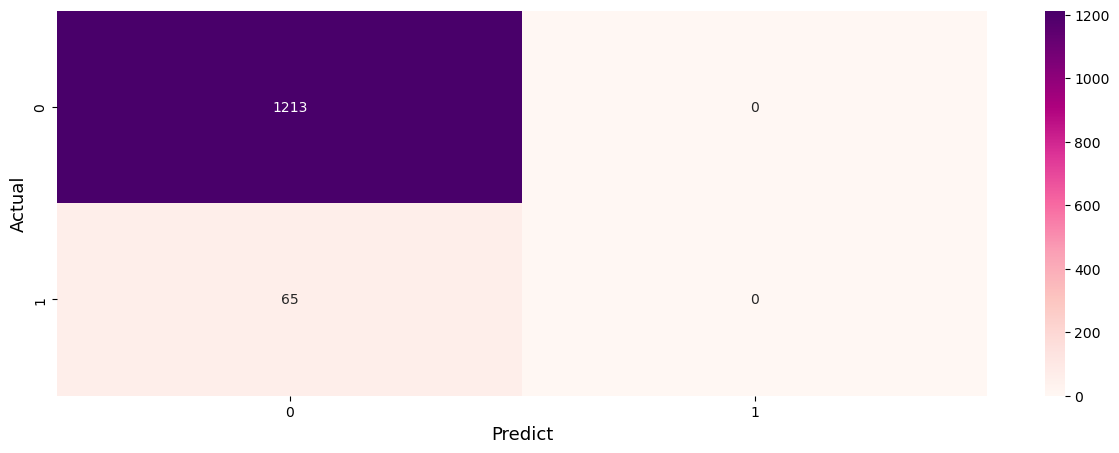

In [40]:
plt.figure(figsize=(15,5))
p=rfClassifier.predict(x_tst)
c= confusion_matrix(y_tst,p)
sns.heatmap(c,annot=True,fmt="d",cmap="RdPu")
plt.xlabel("Predict",fontsize=13)
plt.ylabel("Actual",fontsize=13)

In [41]:
#Logistic Regression Classifier

In [42]:
lrClassifier=LogisticRegression(penalty="l2",max_iter=100,C=3)
lrClassifier.fit(x_tr,y_tr)

LogisticRegression(C=3)

In [43]:
lrClassifier.score(x_tr,y_tr)

0.951722338204593

In [44]:
print("Logistic Regression Classifier Score:",lrClassifier.score(x_tst,y_tst))

Logistic Regression Classifier Score: 0.9491392801251957


Text(158.22222222222223, 0.5, 'Actual')

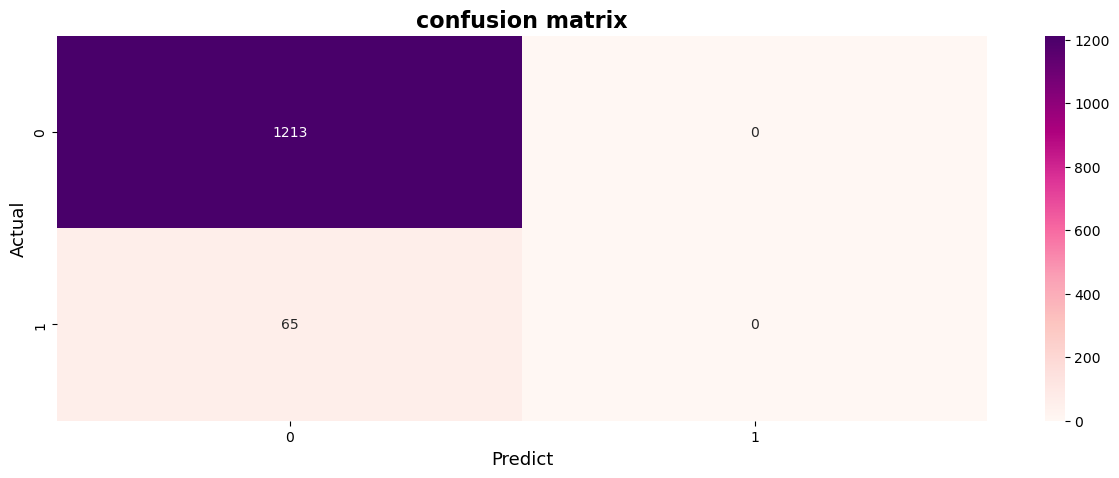

In [45]:
plt.figure(figsize=(15,5))
p=lrClassifier.predict(x_tst)
c= confusion_matrix(y_tst,p)
sns.heatmap(c,annot=True,fmt="d",cmap="RdPu")
plt.title("confusion matrix",fontsize=16,weight="bold")
plt.xlabel("Predict",fontsize=13)
plt.ylabel("Actual",fontsize=13)

In [46]:
#Support Vector Classifier:

In [47]:
svClassifier=SVC(kernel="linear", random_state=0 )
svClassifier.fit(x_tr, y_tr)

SVC(kernel='linear', random_state=0)

In [48]:
svClassifier.fit(x_tr, y_tr)
svClassifier.score(x_tr, y_tr)

0.9519832985386222

In [49]:
print("Support Vector Classifier Score:", svClassifier.score(x_tst, y_tst))

Support Vector Classifier Score: 0.9491392801251957


Text(158.22222222222223, 0.5, 'Actual')

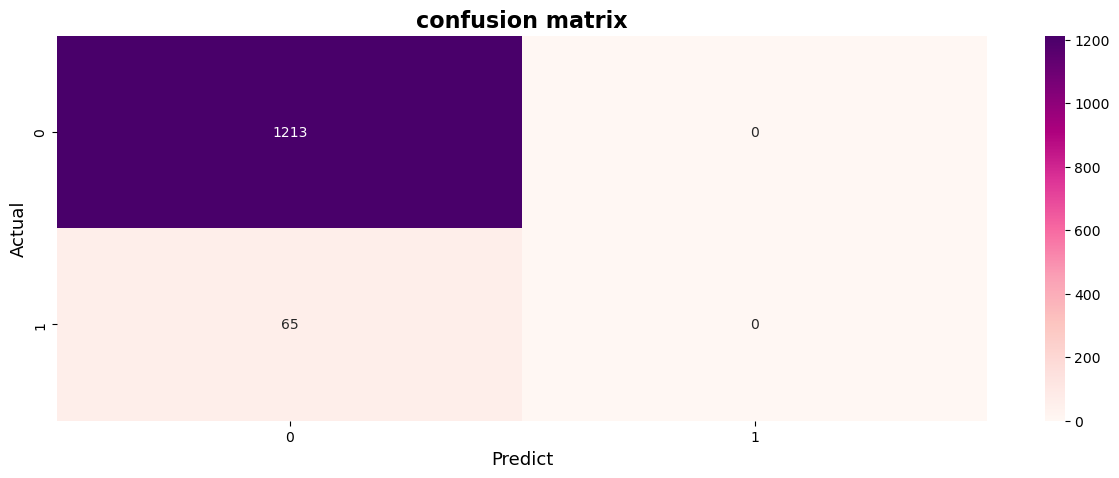

In [50]:
plt.figure(figsize=(15,5))
p=svClassifier.predict(x_tst)
c= confusion_matrix(y_tst,p)
sns.heatmap(c,annot=True,fmt="d",cmap="RdPu")
plt.title("confusion matrix",fontsize=16,weight="bold")
plt.xlabel("Predict",fontsize=13)
plt.ylabel("Actual",fontsize=13)

In [51]:
y_pred=svClassifier.predict(x_tst)

In [52]:
print("Accuracy: ",accuracy_score(y_tst,y_pred))
print("\nClassification Report: \n", classification_report(y_tst,y_pred))

Accuracy:  0.9491392801251957

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1213
         1.0       0.00      0.00      0.00        65

    accuracy                           0.95      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.90      0.95      0.92      1278



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
#################test#######################
lrClassifier = LogisticRegression()
lrClassifier.fit(x_tr, y_tr)

LogisticRegression()

In [54]:
y_pred_lr = lrClassifier.predict(x_tst)

In [55]:
accuracy_lr=round(accuracy_score(y_tst, y_pred_lr)*100, 2)
print("accuracy",accuracy_lr,"%")

accuracy 94.91 %


In [56]:
lr_score = lrClassifier.score(x_tr, y_tr)

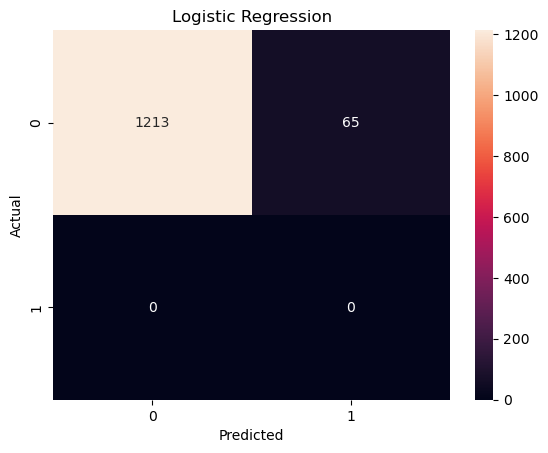

In [57]:
import sklearn.metrics as mt
sns.heatmap(mt.confusion_matrix(y_pred_lr,y_tst),annot = True,fmt = "d")
plt.title("Logistic Regression")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
#################endtest#######################

In [58]:
#KNN Classifier Score:

In [59]:
knnClassifier = KNeighborsClassifier(10)

In [60]:
knnClassifier.fit(x_tr, y_tr)

KNeighborsClassifier(n_neighbors=10)

In [61]:
knnClassifier.score(x_tr, y_tr)

0.9519832985386222

In [62]:
print("KNN Classifier Score:",knnClassifier.score(x_tst, y_tst))

KNN Classifier Score: 0.9491392801251957


In [63]:
#Decision Tree Classifier

In [64]:
dtClassifier = DecisionTreeClassifier()


In [65]:
dtClassifier.fit(x_tr, y_tr)
dtClassifier.score(x_tr, y_tr)

1.0

In [66]:
print("Decision Tree Classifier Score:",dtClassifier.score(x_tst, y_tst) )

Decision Tree Classifier Score: 0.906885758998435


In [67]:
from sklearn.naive_bayes import GaussianNB
nbClassifier = GaussianNB()
nbClassifier.fit(x_tr, y_tr)
nbClassifier.score(x_tr, y_tr)

0.8674321503131524

In [68]:
print("Naive Bayes Classifier Score:", nbClassifier.score(x_tst, y_tst))

Naive Bayes Classifier Score: 0.8755868544600939


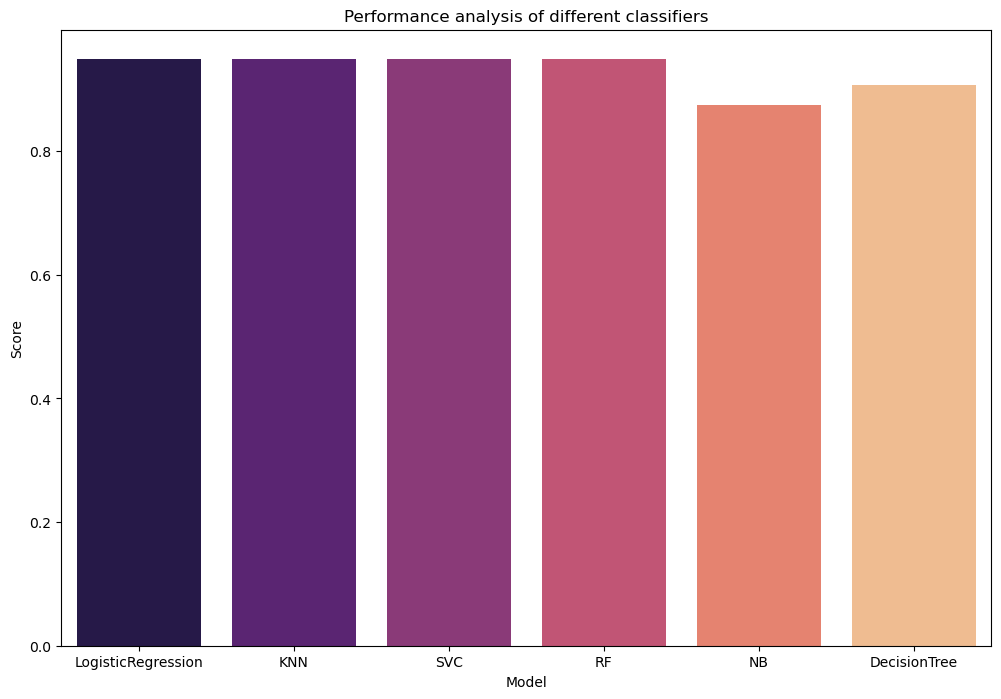

In [69]:
dataPerf = pd.DataFrame(data={'Model': ['LogisticRegression', 'KNN', 'SVC', 'RF','NB', 'DecisionTree'], 'Score': [lrClassifier.score(x_tst,y_tst), knnClassifier.score(x_tst,y_tst), svClassifier.score(x_tst,y_tst), rfClassifier.score(x_tst,y_tst), nbClassifier.score(x_tst,y_tst),dtClassifier.score(x_tst,y_tst)]})
plt.figure(figsize=(12, 8))
sns.barplot(x="Model", y="Score", data=dataPerf, palette="magma")
plt.title('Performance analysis of different classifiers')
plt.show()